In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interp
from sklearn.metrics import  auc

In [3]:
precision=pd.read_csv('./precision_s.csv')
precision

,0,1,2,3,4,5,6,7,8,9,...,786,787,788,789,790,791,792,793,794,795
0,0.823171,0.822901,0.824159,0.825421,0.826687,0.827957,0.829231,0.830508,0.831790,0.833076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.694340,0.693955,0.694830,0.695707,0.696587,0.697468,0.698352,0.699239,0.700127,0.701018,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.500464,0.861789,0.863192,0.862969,0.864379,0.865794,0.867213,0.868637,0.870066,0.869852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.753121,0.752778,0.753825,0.754875,0.755927,0.756983,0.758042,0.759104,0.760168,0.761236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.481894,0.847682,0.849088,0.850498,0.851913,0.853333,0.854758,0.856187,0.857621,0.859060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
recall=pd.read_csv('./recall_s.csv')
recall


,0,1,2,3,4,5,6,7,8,9,...,786,787,788,789,790,791,792,793,794,795
0,1.0,0.998148,0.998148,0.998148,0.998148,0.998148,0.998148,0.998148,0.998148,0.998148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.998188,0.998188,0.998188,0.998188,0.998188,0.998188,0.998188,0.998188,0.998188,...,0.016304,0.014493,0.012681,0.01087,0.009058,0.007246,0.005435,0.003623,0.001812,0.0
2,1.0,0.983302,0.983302,0.981447,0.981447,0.981447,0.981447,0.981447,0.981447,0.979592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.998158,0.998158,0.998158,0.998158,0.998158,0.998158,0.998158,0.998158,0.998158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.986513,0.986513,0.986513,0.986513,0.986513,0.986513,0.986513,0.986513,0.986513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
auprs=pd.read_csv('./test_auprs.csv')
auprs

,0
0,0.974376
1,0.970030
2,0.966981
3,0.981337
4,0.975299


In [6]:
def MyEnlarge(x0, y0, width, height, x1, y1, times, mean_fpr, mean_tpr, thickness=1, color = 'blue'):
    def MyFrame(x0, y0, width, height):
        import matplotlib.pyplot as plt
        import numpy as np

        x1 = np.linspace(x0, x0, num=20)  # 生成列的横坐标，横坐标都是x0，纵坐标变化
        y1 = np.linspace(y0, y0, num=20)
        xk = np.linspace(x0, x0 + width, num=20)
        yk = np.linspace(y0, y0 + height, num=20)

        xkn = []
        ykn = []
        counter = 0
        while counter < 20:
            xkn.append(x1[counter] + width)
            ykn.append(y1[counter] + height)
            counter = counter + 1

        plt.plot(x1, yk, color='k', linestyle=':', lw=1, alpha=1)  # 左
        plt.plot(xk, y1, color='k', linestyle=':', lw=1, alpha=1)  # 下
        plt.plot(xkn, yk, color='k', linestyle=':', lw=1, alpha=1)  # 右
        plt.plot(xk, ykn, color='k', linestyle=':', lw=1, alpha=1)  # 上

        return
    # 画虚线框
    width2 = times * width
    height2 = times * height
    MyFrame(x0, y0, width, height)
    MyFrame(x1, y1, width2, height2)

    # 连接两个虚线框
    xp = np.linspace(x0 , x1+width2, num=20)
    yp = np.linspace(y0, y1 + height2, num=20)
    plt.plot(xp, yp, color='k', linestyle=':', lw=1, alpha=1)

    # 小虚框内各点坐标
    XDottedLine = []
    YDottedLine = []
    counter = 0
    while counter < len(mean_fpr):
        if mean_fpr[counter] > x0 and mean_fpr[counter] < (x0 + width) and mean_tpr[counter] > y0 and mean_tpr[counter] < (y0 + height):
            XDottedLine.append(mean_fpr[counter])
            YDottedLine.append(mean_tpr[counter])
        counter = counter + 1

    # 画虚线框内的点
    # 把小虚框内的任一点减去小虚框左下角点生成相对坐标，再乘以倍数（4）加大虚框左下角点
    counter = 0
    while counter < len(XDottedLine):
        XDottedLine[counter] = (XDottedLine[counter] - x0) * times + x1
        YDottedLine[counter] = (YDottedLine[counter] - y0) * times + y1
        counter = counter + 1


    plt.plot(XDottedLine, YDottedLine, color=color, lw=thickness, alpha=1)
    return

In [7]:
pres = []

mean_res = np.linspace(0, 1, 1000)

colorlist = ['red', 'gold', 'purple', 'green', 'blue', 'black']

/var/folders/37/2brzhtcs52160y_wjzcp3k_h0000gn/T/ipykernel_3953/1233177735.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  pres.append(interp(mean_res, re, pre))


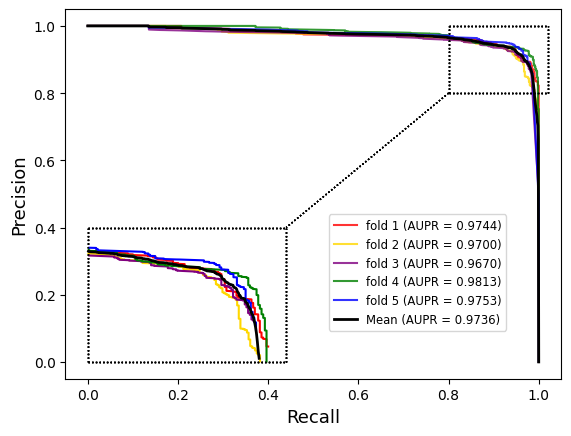

In [9]:
for i in range(len(precision)):
    pre=precision.iloc[i,:].dropna().tolist()
    pre.insert(0, 0)
    pre.sort(reverse=True)
    re=recall.iloc[i,:].dropna().tolist()
    re.insert(0, 1)
    re.sort()
    
    pres.append(interp(mean_res, re, pre))
    aupr=auprs.iloc[:,0].tolist()
    
    plt.plot(re, pre, lw=1.5, alpha=0.8, color=colorlist[i],label='fold %d (AUPR = %0.4f)' % (i+1, aupr[i]))
    MyEnlarge(0.8, 0.8, 0.22, 0.2, 0, 0, 2, re,pre, 1.5, colorlist[i])

mean_pres = np.mean(pres, axis=0)

plt.plot(mean_res,mean_pres ,color='black',label=r'Mean (AUPR = %.4f)' % (np.mean(aupr)),lw=2, alpha=1)
MyEnlarge(0.8, 0.8, 0.22, 0.2, 0, 0, 2, mean_res ,mean_pres,2, colorlist[5])
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall',fontsize=13)
plt.ylabel('Precision',fontsize=13)
# plt.title('Receiver operating characteristic')
plt.legend(bbox_to_anchor=(0.52, 0.46),fontsize='small')
# plt.plot([0, 1], [1, 0], color='navy', lw=2, linestyle='--')
# plt.grid(linestyle='-')
# # 保存图片
plt.savefig('PR-5fold.svg',dpi=900)
plt.savefig('PR-5fold.tif',dpi=900)
plt.show()

# AUC

In [10]:
def ReadMyCsv(df):
    fprs=pd.read_csv(df)
    fpr=[]
    for index,row in fprs.iterrows():
        fpr.append(row.dropna().tolist())
    return fpr

In [11]:
def MyEnlarge(x0, y0, width, height, x1, y1, times, mean_fpr, mean_tpr, thickness=1, color='blue'):
    def MyFrame(x0, y0, width, height):
        import matplotlib.pyplot as plt
        import numpy as np

        x1 = np.linspace(x0, x0, num=20)
        y1 = np.linspace(y0, y0, num=20)
        xk = np.linspace(x0, x0 + width, num=20)
        yk = np.linspace(y0, y0 + height, num=20)

        xkn = []
        ykn = []
        counter = 0
        while counter < 20:
            xkn.append(x1[counter] + width)
            ykn.append(y1[counter] + height)
            counter = counter + 1

        plt.plot(x1, yk, color='k', linestyle=':', lw=1, alpha=1)  # 左
        plt.plot(xk, y1, color='k', linestyle=':', lw=1, alpha=1)  # 下
        plt.plot(xkn, yk, color='k', linestyle=':', lw=1, alpha=1)  # 右
        plt.plot(xk, ykn, color='k', linestyle=':', lw=1, alpha=1)  # 上

        return

    # 画虚线框
    width2 = times * width
    height2 = times * height
    MyFrame(x0, y0, width, height)
    MyFrame(x1, y1, width2, height2)

    # 连接两个虚线框
    xp = np.linspace(x0 + width, x1, num=20)
    yp = np.linspace(y0, y1 + height2, num=20)
    plt.plot(xp, yp, color='k', linestyle=':', lw=1, alpha=1)

    # 小虚框内各点坐标
    XDottedLine = []
    YDottedLine = []
    counter = 0
    while counter < len(mean_fpr):
        if mean_fpr[counter] > x0 and mean_fpr[counter] < (x0 + width) and mean_tpr[counter] > y0 and mean_tpr[
            counter] < (y0 + height):
            XDottedLine.append(mean_fpr[counter])
            YDottedLine.append(mean_tpr[counter])
        counter = counter + 1
    print(len(XDottedLine))
    print(len(YDottedLine))
    # 画虚线框内的点
    # 把小虚框内的任一点减去小虚框左下角点生成相对坐标，再乘以倍数（4）加大虚框左下角点
    counter = 0
    while counter < len(XDottedLine):
        XDottedLine[counter] = (XDottedLine[counter] - x0) * times + x1
        YDottedLine[counter] = (YDottedLine[counter] - y0) * times + y1
        counter = counter + 1

    plt.plot(XDottedLine, YDottedLine, color=color, lw=thickness, alpha=1)
    return


In [13]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 1000)
i = 0
colorlist = ['red', 'gold', 'purple', 'green', 'blue', 'black']
RealAndPrediction = []
AllResult = []

counter = 0

fpr=[]
tpr=[]
tprs=[]
aucss=[]
mean_fpr = np.linspace(0, 1, 1000)
fpr=ReadMyCsv('fprs.csv')
tpr=ReadMyCsv('tprs.csv')
aucss=ReadMyCsv('test_auc_scores.csv')

[0.0, 0.0, 0.0, 0.0018587360594795, 0.0018587360594795, 0.0055762081784386, 0.0055762081784386, 0.0074349442379182, 0.0074349442379182, 0.0092936802973977, 0.0092936802973977, 0.0111524163568773, 0.0111524163568773, 0.0130111524163568, 0.0130111524163568, 0.0148698884758364, 0.0148698884758364, 0.0167286245353159, 0.0167286245353159, 0.0185873605947955, 0.0185873605947955, 0.020446096654275, 0.020446096654275, 0.0223048327137546, 0.0223048327137546, 0.0260223048327137, 0.0260223048327137, 0.0278810408921933, 0.0278810408921933, 0.0297397769516728, 0.0297397769516728, 0.0315985130111524, 0.0315985130111524, 0.0334572490706319, 0.0334572490706319, 0.0353159851301115, 0.0353159851301115, 0.037174721189591, 0.037174721189591, 0.0390334572490706, 0.0390334572490706, 0.0408921933085501, 0.0408921933085501, 0.0427509293680297, 0.0427509293680297, 0.0446096654275092, 0.0446096654275092, 0.0464684014869888, 0.0464684014869888, 0.0501858736059479, 0.0501858736059479, 0.0520446096654275, 0.052044

/var/folders/37/2brzhtcs52160y_wjzcp3k_h0000gn/T/ipykernel_3953/2123596193.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr,fpr1,tpr1))
/Users/weicheng/opt/miniconda3/envs/pic/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/weicheng/opt/miniconda3/envs/pic/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/weicheng/opt/miniconda3/envs/pic/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


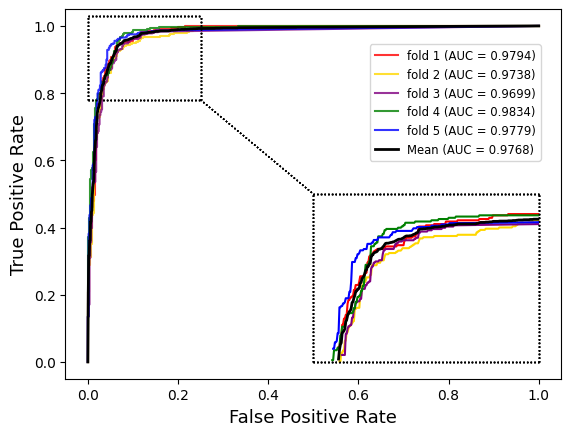

In [14]:
i=0
while i<5:
    fpr1=[]
    tpr1=[]
    print(fpr[i])
    for x in fpr[i]:  fpr1.append(float(x))
    for xx in tpr[i]: tpr1.append(float(xx))
    
    tprs.append(interp(mean_fpr,fpr1,tpr1))
    tprs[-1][0]=0.0

    fpr1.insert(0, 0)
    tpr1.insert(0, 0)

    auc1=float(aucss[i][0])
    plt.plot(fpr1, tpr1, lw=1.5, alpha=0.8, color=colorlist[i],
             label='fold %d (AUC = %0.4f)'% (i+1,auc1))
    MyEnlarge(0, 0.78, 0.25, 0.25, 0.5, 0, 2, mean_fpr, tprs[i], 1.5, colorlist[i])
    i+=1

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean (AUC = %0.4f)' % (mean_auc),
         lw=2, alpha=1)
MyEnlarge(0, 0.78, 0.25, 0.25, 0.5, 0, 2, mean_fpr, mean_tpr, 2, colorlist[5])

FprAndTpr = []
counter = 0
while counter < len(mean_fpr):
    pair = []
    pair.append(mean_fpr[counter])
    pair.append(mean_tpr[counter])
    FprAndTpr.append(pair)
    counter = counter + 1


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
# plt.title('Receiver operating characteristic')
plt.legend(bbox_to_anchor=(0.97, 0.92),loc='upper right', fontsize='small')
#
# 保存图片
plt.savefig('5fold-manner.svg')
plt.savefig('5fold-manner.tif')
plt.show()